<div style="text-align: center;">
    <h2>Importing Libraries</h2>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

<div style="text-align: center;">
    <h2>Loading the Dataset</h2>
</div>

In [2]:
df = pd.read_csv('MN-DS-news-classification.csv')

<div style="text-align: center;">
    <h2>Initial Data Inspection</h2>
</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10917 entries, 0 to 10916
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   data_id           10917 non-null  int64 
 1   id                10917 non-null  object
 2   date              10917 non-null  object
 3   source            10917 non-null  object
 4   title             10917 non-null  object
 5   content           10917 non-null  object
 6   author            7605 non-null   object
 7   url               10917 non-null  object
 8   published         10917 non-null  object
 9   published_utc     10917 non-null  int64 
 10  collection_utc    10917 non-null  int64 
 11  category_level_1  10917 non-null  object
 12  category_level_2  10917 non-null  object
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

data_id                0
id                     0
date                   0
source                 0
title                  0
content                0
author              3312
url                    0
published              0
published_utc          0
collection_utc         0
category_level_1       0
category_level_2       0
dtype: int64

In [5]:
df.iloc[0]

data_id                                                          1809
id                  abcnews--2019-10-31--Virginia mom charged with...
date                                                       2019-10-31
source                                                        abcnews
title               Virginia mom charged with murder in 2-year-old...
content             The Virginia woman whose 2-year-old son was fo...
author                                                            NaN
url                 https://abcnews.go.com/US/wireStory/virginia-m...
published                             Thu, 31 Oct 2019 16:49:56 -0400
published_utc                                              1572554996
collection_utc                                             1572559512
category_level_1                               crime, law and justice
category_level_2                                                crime
Name: 0, dtype: object

<div style="text-align: center;">
    <h2>Exploring the Data</h2>
</div>

In [6]:
category_level_1_unique = df['category_level_1'].unique()
category_level_2_unique = df['category_level_2'].unique()
df.category_level_1.nunique(), df.category_level_2.nunique()

(17, 109)

In [7]:
print('category_level_1_unique =', len(category_level_1_unique))
category_level_1_unique

category_level_1_unique = 17


array(['crime, law and justice', 'arts, culture, entertainment and media',
       'economy, business and finance',
       'disaster, accident and emergency incident', 'environment',
       'education', 'health', 'human interest', 'lifestyle and leisure',
       'politics', 'labour', 'religion and belief',
       'science and technology', 'society', 'sport',
       'conflict, war and peace', 'weather'], dtype=object)

In [8]:
print('category_level_2_unique =', len(category_level_2_unique))
category_level_2_unique

category_level_2_unique = 109


array(['crime', 'justice', 'arts and entertainment', 'mass media',
       'culture', 'law', 'law enforcement', 'economy',
       'market and exchange', 'business information', 'economic sector',
       'disaster', 'climate change', 'natural resources', 'school',
       'religious education', 'teaching and learning', 'judiciary',
       'accident and emergency incident', 'emergency response',
       'parent organisation', 'social learning', 'vocational education',
       'conservation', 'environmental politics',
       'environmental pollution', 'nature', 'diseases and conditions',
       'health facility', 'health treatment', 'non-human diseases',
       'ceremony', 'accomplishment', 'anniversary', 'people', 'animal',
       'plant', 'exercise and fitness', 'leisure', 'election',
       'lifestyle', 'retirement', 'religious text', 'biomedical science',
       'employment', 'labour market', 'labour relations',
       'political crisis', 'political dissent', 'fundamental rights',
       

In [9]:
# df['category_level_1'].value_counts().sort_index()
df['category_level_1'].value_counts().sort_values(ascending=True)

category_level_1
lifestyle and leisure                         300
arts, culture, entertainment and media        300
economy, business and finance                 400
weather                                       400
disaster, accident and emergency incident     500
crime, law and justice                        500
human interest                                600
environment                                   600
education                                     607
health                                        700
labour                                        703
science and technology                        800
religion and belief                           800
conflict, war and peace                       800
politics                                      900
sport                                         907
society                                      1100
Name: count, dtype: int64

In [10]:
df['category_level_2'].value_counts().sort_values(ascending=True)

category_level_2
religious belief                              100
law                                           100
law enforcement                               100
economy                                       100
market and exchange                           100
business information                          100
economic sector                               100
disaster                                      100
climate change                                100
natural resources                             100
religious education                           100
teaching and learning                         100
judiciary                                     100
accident and emergency incident               100
emergency response                            100
parent organisation                           100
social learning                               100
conservation                                  100
environmental politics                        100
environmental pollution          

<div style="text-align: center;">
    <h2>Visualizing the Data</h2>
</div>

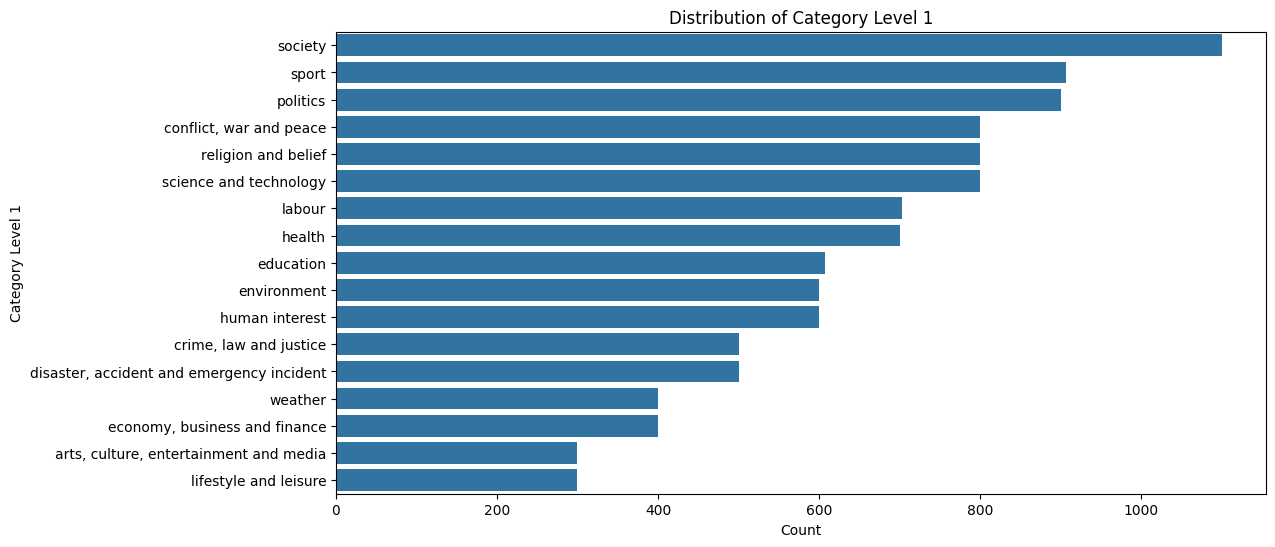

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='category_level_1', order=df['category_level_1'].value_counts().index)
plt.title('Distribution of Category Level 1')
plt.xlabel('Count')
plt.ylabel('Category Level 1')
plt.show()
